# Get word embeddings using Word2Vec

Credits: https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92#702d

In [108]:
import pandas as pd
import numpy as np
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [109]:
from gensim.models import Word2Vec
import gensim

In [110]:
#df = pd.DataFrame(pd.read_pickle('df_tokenized'))
df = pd.DataFrame(pd.read_pickle('df_add_feat'))
#target
y=pd.cut(df.Rank,bins=[0,50,100],labels=[1,0])
#features
df=df['lyrics_clean']
df.head()

0    sam the sham miscellaneous wooly bully wooly b...
1    sugar pie honey bunch you know that i love you...
2                                                     
3    when i woke up this morning you were on my min...
4    you never close your eyes anymore when i kiss ...
Name: lyrics_clean, dtype: object

In [111]:
## split dataset
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.33, random_state=42)

In [113]:
#preprocessing - gensim requires list of list representation
corpus=X_train
## create list of lists of unigrams
lst_corpus = []
for string in corpus:
   lst_words = string.split()
   lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, len(lst_words), 1)]
   lst_corpus.append(lst_grams)


In [114]:
#train gensim word2vec model
model = Word2Vec(lst_corpus,vector_size=300,window=8, min_count=1, sg=1)

In [115]:
print("size of word vector: ", len(model.wv['love']))

size of word vector:  300


In [116]:
model.wv.similarity('love', 'like')

0.3018259

In [117]:
model.wv.similarity('love', 'hate')

0.3383848

In [118]:
model.wv.most_similar('love')

[('forsake', 0.6635217666625977),
 ('reveal', 0.6464510560035706),
 ('protection', 0.6455844640731812),
 ('willi', 0.6446429491043091),
 ('bele', 0.6421770453453064),
 ('rare', 0.6338766813278198),
 ('tainted', 0.6259242296218872),
 ('conscience', 0.6241247653961182),
 ('yearning', 0.6227433681488037),
 ('gladly', 0.6210116147994995)]

In [126]:
X_train

941     i used to be a rolling stone you know if a cau...
444     yeah yeah yeah yeah yeah yeah popcorn yeah yea...
1326    nobody gets too much heaven no more its much h...
684     last night i didnt get to sleep at all no no i...
3803    remember when i was young and so were you and ...
                              ...                        
4445    ly in here with you so close to me its hard to...
471     i cant stop this feel in deep inside of me gir...
3111    im look in over the skyline of the city how lo...
3791    certified quality a dat da girl dem need and d...
868     wherever you go wherever you may wander in you...
Name: lyrics_clean, Length: 3255, dtype: object

In [131]:
#set of all tokens
tokens = []
for string in X_train:
    lst_words = string.split()
    for word in lst_words:
        tokens.append(word)

set_tokens=set(tokens)

In [132]:
#cosine similarity
from numpy.linalg import norm
def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model.wv[word]
    for item in target_list :
        if item != word :
            b = model.wv[item]
            cos_sim = np.dot(a, b)/(norm(a)*norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descending order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

In [133]:
cosine_distance(model,'love',set_tokens,5)

[('forsake', 0.6635218),
 ('reveal', 0.64645106),
 ('protection', 0.6455845),
 ('willi', 0.64464295),
 ('bele', 0.64217705)]

## Embedding matrix

The embedding matrix has the following dimensions: number of columns equal to the number of the embedding dimension (here:300) x number of unique words. Matrix of word embeddings will be used as a weight matrix in the neural network classifier.

In [134]:
#use word vectors as features
def get_word_vectors(model, set_tokens):
    wv=[]
    for token in set_tokens:
        wv.append(model.wv[token])

    wv=pd.DataFrame(wv, index=list(set_tokens))
    
    return wv
        
df_wv=get_word_vectors(model,set_tokens)


In [135]:
df_wv.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
windows,0.037718,0.017834,0.088802,-0.110662,0.008419,0.240243,0.019919,0.159748,0.105924,0.019943,...,0.149824,0.143171,-0.008795,-0.098700,-0.022773,0.089984,-0.084374,-0.051082,0.189715,-0.034099
alga,0.003900,0.117164,-0.020418,-0.052630,-0.012302,-0.040892,0.056737,0.018496,0.057413,-0.043669,...,0.019416,-0.003301,0.127715,-0.047112,0.080986,0.095495,-0.033568,0.043821,0.055266,-0.066518
babysit,0.110012,0.330707,-0.004958,0.053938,0.035957,-0.046137,-0.056473,0.153955,0.121618,-0.121898,...,-0.118448,-0.035442,0.124680,0.106722,0.144660,0.233357,0.055906,0.101780,0.134200,-0.125592
gaze,0.047441,0.189099,0.051389,-0.038104,-0.002722,0.007347,0.139812,0.112888,0.030786,-0.008278,...,0.017366,0.078734,0.005316,-0.058752,0.033641,0.137589,-0.004606,0.091270,0.104496,-0.086093
tigers,0.057351,0.139880,-0.036175,-0.048083,0.012841,-0.045977,0.106715,0.066048,0.074795,-0.101412,...,0.039160,0.001350,0.112563,-0.033092,0.174091,0.061496,-0.050804,0.047584,0.057682,-0.101459


In [136]:
df_wv.shape

(15705, 300)

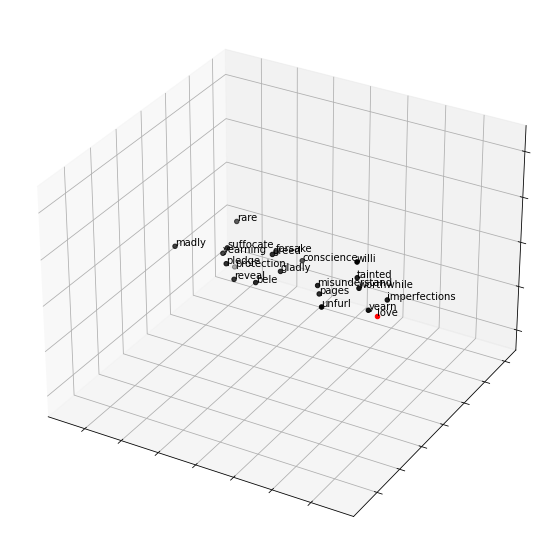

In [137]:
#plot word embeddings 

import warnings
warnings.filterwarnings('ignore')
word = "love"
fig = plt.figure(figsize=[10,10])
## word embedding
tot_words = [word] + [tupla[0] for tupla in 
                 model.wv.most_similar(word, topn=20)]
X =  model.wv[tot_words]
## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)
## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1
## plot 3d
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)

## Neural Network using word embeddings

Credits: https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794

## Create feature matrix

In [138]:
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K

In [139]:
type(X_train)

pandas.core.series.Series

In [140]:
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index
## create sequence
lst_text2seq= tokenizer.texts_to_sequences(lst_corpus)

In [141]:
#get max len sequence
max_len=max([len(list) for list in lst_text2seq])
print("Max length of sequence is: ", max_len)

Max length of sequence is:  1229


In [142]:
## padding sequence
X_train = kprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=max_len, padding="post", truncating="post")

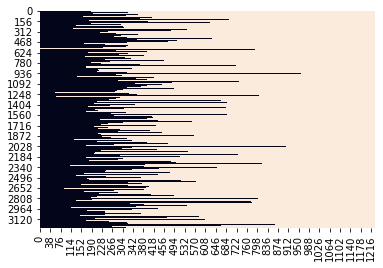

In [143]:
sns.heatmap(X_train==0, vmin=0, vmax=1, cbar=False)
plt.show()

In [144]:
#preprocessing on test set
corpus = X_test

## create list of n-grams
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                 len(lst_words), 1)]
    lst_corpus.append(lst_grams)
    

## padding sequence
X_test = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=15,
             padding="post", truncating="post")


## Create embeddings matrix

In [149]:
embeddings=df_wv
## code attention layer
def attention_layer(inputs, neurons):
    x = layers.Permute((2,1))(inputs)
    x = layers.Dense(neurons, activation="softmax")(x)
    x = layers.Permute((2,1), name="attention")(x)
    x = layers.multiply([inputs, x])
    return x

## input
x_in = layers.Input(shape=(max_len,))
## embedding
x = layers.Embedding(input_dim=embeddings.shape[0],  
                     output_dim=embeddings.shape[1], 
                     weights=[embeddings],
                     input_length=max_len, trainable=False)(x_in)
## apply attention
x = attention_layer(x, neurons=max_len)
## 2 layers of bidirectional lstm
x = layers.Bidirectional(layers.LSTM(units=max_len, dropout=0.2, 
                         return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=max_len, dropout=0.2))(x)
## final dense layers
x = layers.Dense(64, activation='relu')(x)
y_out = layers.Dense(3, activation='softmax')(x)
## compile
model = models.Model(x_in, y_out)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 1229)]       0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1229, 300)    4711500     input_4[0][0]                    
__________________________________________________________________________________________________
permute_3 (Permute)             (None, 300, 1229)    0           embedding_3[0][0]                
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 300, 1229)    1511670     permute_3[0][0]                  
____________________________________________________________________________________________

In [ ]:
## encode y
dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array([inverse_dic[y] for y in y_train])
## train
training = model.fit(x=X_train, y=y_train, batch_size=256, 
                     epochs=10, shuffle=True, verbose=0, 
                     validation_split=0.3)
## plot loss and accuracy
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()